# Recurrent Neural Networks on **`Sin wave function`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
x = np.linspace(0, 50, 501)
y = np.sin(x)

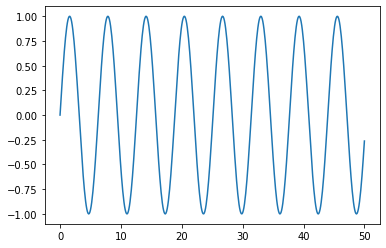

In [3]:
plt.plot(x, y)

In [4]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


# Train Test Split

In [5]:
test_size = round(len(df) * 0.1)
split_index = len(df) - test_size
split_index

451

In [6]:
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

In [7]:
train_df.tail()

,Sine
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208
45.0,0.850904


In [8]:
test_df.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [52]:
print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (451, 1)
Test shape: (50, 3)


# Scale Data

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train = scaler.transform(train_df)
test = scaler.transform(test_df)

# Time Series Generator

In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 2
batch_size = 1
generator = TimeseriesGenerator(train, train, length=length, batch_size=batch_size)

In [13]:
len(generator)

449

In [14]:
X, y = generator[0]

In [15]:
X.flatten()

array([0.49999912, 0.54991622])

In [16]:
y

array([[0.59933458]])

In [17]:
length = 10
batch_size = 1
generator = TimeseriesGenerator(train, train, length=length, batch_size=batch_size)

In [18]:
X, y = generator[0]

In [19]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571]]])

In [20]:
y

array([[0.92073798]])

In [21]:
length = 50
batch_size = 1
generator = TimeseriesGenerator(train, train, length=length, batch_size=batch_size)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [23]:
n_features = 1

In [24]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(generator, epochs=15)

  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/15
401/401 [==============================] - 16s 41ms/step - loss: 0.0083
Epoch 2/15
401/401 [==============================] - 14s 35ms/step - loss: 0.0013
Epoch 3/15
401/401 [==============================] - 14s 35ms/step - loss: 1.0888e-04
Epoch 4/15
401/401 [==============================] - 14s 35ms/step - loss: 5.8447e-04
Epoch 5/15
401/401 [==============================] - 14s 36ms/step - loss: 3.9219e-05
Epoch 6/15
401/401 [==============================] - 14s 36ms/step - loss: 5.5569e-05
Epoch 7/15
401/401 [==============================] - 14s 35ms/step - loss: 3.5152e-04
Epoch 8/15
401/401 [==============================] - 14s 35ms/step - loss: 2.2298e-04
Epoch 9/15
401/401 [==============================] - 14s 35ms/step - loss: 2.1421e-04
Epoch 10/15
401/401 [==============================] - 14s 36ms/step - loss: 4.8294e-05
Epoch 11/15
401/401 [==============================] - 15s 38ms/step - loss: 9.1452e-05
Epoc

In [27]:
first_eval_batch = train[-length:]
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [28]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

model.predict(first_eval_batch)

array([[0.93181723]], dtype=float32)

In [29]:
test[0]

array([0.94955134])

In [30]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [31]:
current_batch.shape

(1, 50, 1)

In [32]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [33]:
np.append(current_batch[:, 1:, :], [[[99]]], axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [34]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [35]:
test_predictions

[array([0.93181723], dtype=float32),
 array([0.9492728], dtype=float32),
 array([0.9536879], dtype=float32),
 array([0.959166], dtype=float32),
 array([0.9517324], dtype=float32),
 array([0.94460636], dtype=float32),
 array([0.9319781], dtype=float32),
 array([0.91437787], dtype=float32),
 array([0.8928014], dtype=float32),
 array([0.86607295], dtype=float32),
 array([0.83424747], dtype=float32),
 array([0.8024502], dtype=float32),
 array([0.7644757], dtype=float32),
 array([0.7260526], dtype=float32),
 array([0.6823659], dtype=float32),
 array([0.6374862], dtype=float32),
 array([0.59153163], dtype=float32),
 array([0.5426468], dtype=float32),
 array([0.49404255], dtype=float32),
 array([0.44297808], dtype=float32),
 array([0.3924493], dtype=float32),
 array([0.34272176], dtype=float32),
 array([0.29168606], dtype=float32),
 array([0.24321684], dtype=float32),
 array([0.19499758], dtype=float32),
 array([0.14977261], dtype=float32),
 array([0.10877663], dtype=float32),
 array([0.06755

In [36]:
test_pred = scaler.inverse_transform(test_predictions)

In [37]:
test_pred

array([[ 0.8636293 ],
       [ 0.89854018],
       [ 0.9073703 ],
       [ 0.91832638],
       [ 0.90345931],
       [ 0.88920736],
       [ 0.86395105],
       [ 0.82875085],
       [ 0.78559827],
       [ 0.7321418 ],
       [ 0.66849134],
       [ 0.60489727],
       [ 0.52894893],
       [ 0.4521033 ],
       [ 0.36473063],
       [ 0.274972  ],
       [ 0.18306357],
       [ 0.08529473],
       [-0.01191305],
       [-0.11404115],
       [-0.21509793],
       [-0.31455219],
       [-0.41662277],
       [-0.51356043],
       [-0.60999818],
       [-0.70044738],
       [-0.78243869],
       [-0.86488511],
       [-0.9301226 ],
       [-0.99684102],
       [-1.04728047],
       [-1.09165428],
       [-1.12376107],
       [-1.14435232],
       [-1.15817144],
       [-1.15675447],
       [-1.14346372],
       [-1.12427833],
       [-1.08762544],
       [-1.05139908],
       [-0.99347751],
       [-0.93584665],
       [-0.86474771],
       [-0.78872386],
       [-0.70684404],
       [-0

In [38]:
test_df['pred'] = test_pred

/home/fares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
test_df

,Sine,pred
45.1,0.899097,0.863629
45.2,0.938307,0.898540
45.3,0.968142,0.907370
45.4,0.988304,0.918326
45.5,0.998591,0.903459
45.6,0.998900,0.889207
45.7,0.989229,0.863951
45.8,0.969673,0.828751
45.9,0.940429,0.785598
46.0,0.901788,0.732142


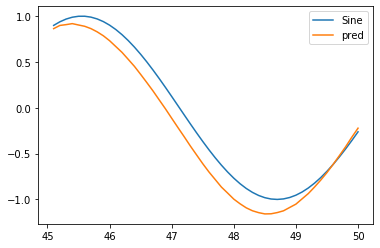

In [40]:
test_df.plot()

In [41]:
model_1 = Sequential()
model_1.add(LSTM(50, input_shape=(length, n_features)))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')

In [42]:
model_1.fit(generator, epochs=20)

  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/20
401/401 [==============================] - 17s 43ms/step - loss: 0.0142
Epoch 2/20
401/401 [==============================] - 16s 39ms/step - loss: 1.0840e-04
Epoch 3/20
401/401 [==============================] - 16s 40ms/step - loss: 1.3749e-04
Epoch 4/20
401/401 [==============================] - 18s 45ms/step - loss: 2.3583e-04
Epoch 5/20
401/401 [==============================] - 19s 47ms/step - loss: 0.0013
Epoch 6/20
401/401 [==============================] - 18s 45ms/step - loss: 4.3011e-05
Epoch 7/20
401/401 [==============================] - 18s 45ms/step - loss: 3.3604e-05
Epoch 8/20
401/401 [==============================] - 18s 46ms/step - loss: 6.1977e-05
Epoch 9/20
401/401 [==============================] - 18s 46ms/step - loss: 5.8093e-05
Epoch 10/20
401/401 [==============================] - 19s 46ms/step - loss: 7.1101e-05
Epoch 11/20
401/401 [==============================] - 18s 46ms/step - loss: 8.9170e-04
Epoc

In [43]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model_1.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [44]:
test_pred = scaler.inverse_transform(test_predictions)

In [48]:
test_df['LSTM'] = test_pred

/home/fares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


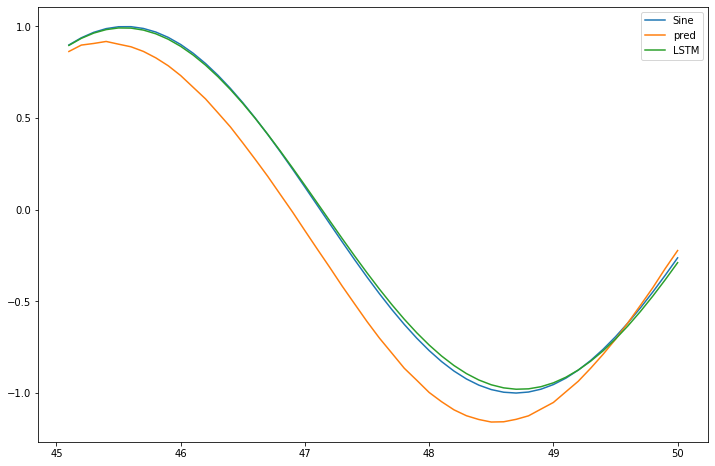

In [51]:
test_df.plot(figsize=(12, 8));

In [ ]:
full_scaler = MinMaxScaler()
